# K means clustering

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
from sklearn.cluster import KMeans

# get the value of k
# calculate inertia which is the within cluster sum of squares (WCSS)

list1 = list()
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, random_state=42)
    k_means.fit(x)
    list1.append(k_means.inertia_)

In [8]:
list1

[681.3706,
 152.3479517603579,
 78.8556658259773,
 57.35088021295475,
 46.472230158730156,
 39.066035353535355,
 34.30581529581531,
 30.476222943722952,
 29.90624665913797,
 28.545297810033105]

## Creating a scree plot

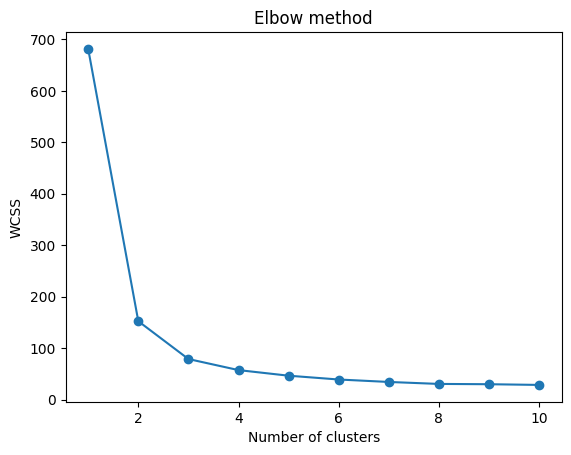

In [10]:
plt.plot(range(1, 11), list1, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### we found the optimal value of k to be 3

In [17]:
kmeans = KMeans(n_clusters=3, random_state=10)
y_means = kmeans.fit_predict(x)
print('The predicted clusters are: ', y_means)
print('The cluster centers are: ', kmeans.cluster_centers_) #for each feature whats the centre

The predicted clusters are:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
The cluster centers are:  [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [23]:
import pandas as pd

data = {'original': y, 'predicted': y_means}
df = pd.DataFrame(data, columns=data.keys())
print(df['predicted'].value_counts())
print(df['original'].value_counts())

df['original'].replace(to_replace=int('0'), value='Setosa', inplace = True)
df['original'].replace(to_replace=int('1'), value='Versicolor', inplace = True)
df['original'].replace(to_replace=int('2'), value='Virginaca', inplace = True)

df['predicted'].replace(to_replace=int('0'), value='Setosa', inplace = True)
df['predicted'].replace(to_replace=int('1'), value='Versicolor', inplace = True)
df['predicted'].replace(to_replace=int('2'), value='Virginaca', inplace = True)

predicted
2    61
1    50
0    39
Name: count, dtype: int64
original
0    50
1    50
2    50
Name: count, dtype: int64


/var/folders/zm/sqf2my0502g0t5fn42g5mlrr0000gn/T/ipykernel_27388/2662534722.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['original'].replace(to_replace=int('0'), value='Setosa', inplace = True)
/var/folders/zm/sqf2my0502g0t5fn42g5mlrr0000gn/T/ipykernel_27388/2662534722.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [24]:
df

,original,predicted
0,Setosa,Versicolor
1,Setosa,Versicolor
2,Setosa,Versicolor
3,Setosa,Versicolor
4,Setosa,Versicolor
...,...,...
145,Virginaca,Setosa
146,Virginaca,Virginaca
147,Virginaca,Setosa
148,Virginaca,Setosa


## Confusion matrix

confusion matrix: 
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


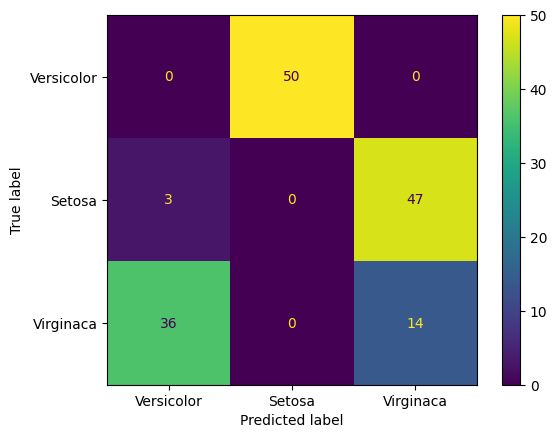

In [36]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(df['original'], df['predicted'])
print('confusion matrix: \n', results)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=results, display_labels=df['predicted'].unique()).plot()

## Determine accuracy

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df['original'], df['predicted'])
print(accuracy)

0.09333333333333334
